In [49]:
import pandas as pd

data_df = pd.read_csv("../data/clean/features.csv")
data_df.head()

,split,duration,tags,key_0,key_1,key_2,key_3,key_4,key_5,key_6,...,key_83,key_84,key_85,key_86,key_87,pitch_range,tempo,avg_note_duration,avg_velocity,velocity_range
0,train,464.649433,modern,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,75.0,195.593838,0.371628,67.903488,112.0
1,train,872.640588,post-romantic,0.0,2.0,1.0,3.0,1.0,6.0,17.0,...,0.0,0.0,0.0,0.0,0.0,81.0,202.212360,0.291267,62.954085,102.0
2,validation,397.857508,romantic,0.0,0.0,0.0,4.0,11.0,1.0,0.0,...,1.0,13.0,0.0,7.0,0.0,83.0,204.545455,0.130260,65.008211,119.0
3,validation,400.557826,romantic,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,69.0,199.021019,0.379225,60.342821,108.0
4,train,563.904351,romantic,0.0,0.0,1.0,1.0,2.0,4.0,21.0,...,0.0,0.0,0.0,0.0,0.0,77.0,197.028327,0.252819,70.214286,110.0


In [50]:
data_df["eras"].value_counts().max()

432

In [51]:
# from sklearn.utils import resample

# romantic_df = data_df[data_df["eras"] == "romantic"]
# baroque_df = data_df[data_df["eras"] == "baroque"]
# impressionist_df = data_df[data_df["eras"] == "impressionist"]
# classical_df = data_df[data_df["eras"] == "classical"]

# max_count = data_df["eras"].value_counts().max()

# romantic_upsampled = resample(romantic_df, replace=True, n_samples=max_count, random_state=42)
# baroque_upsampled = resample(baroque_df, replace=True, n_samples=max_count, random_state=42)
# impressionist_upsampled = resample(impressionist_df, replace=True, n_samples=max_count, random_state=42)
# classical_upsampled = resample(classical_df, replace=True, n_samples=max_count, random_state=42)

# data_df = pd.concat([romantic_upsampled, baroque_upsampled, impressionist_upsampled, classical_upsampled])
# data_df["eras"].value_counts()

In [52]:
X_df = data_df.drop(columns=["eras"])
y_df = data_df["eras"]

X_train = data_df[data_df["split"] == "train"].drop(columns=["split", "eras"])
y_train = data_df[data_df["split"] == "train"]["eras"]

X_test = data_df[data_df["split"] == "test"].drop(columns=["split" ,"eras"])
y_test = data_df[data_df["split"] == "test"]["eras"]

X_validation = data_df[data_df["split"] == "validation"].drop(columns=["split", "eras"])
y_validation = data_df[data_df["split"] == "validation"]["eras"]

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn_max_score = 0
knn_best_neighbors = 0

for i in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    score = knn.score(X_test, y_test)
    if score > knn_max_score:
        knn_max_score = score
        knn_best_neighbors = i

print(f"Best number of neighbors: {knn_best_neighbors}")

Best number of neighbors: 77


In [120]:
knn = KNeighborsClassifier(n_neighbors=knn_best_neighbors)

knn.fit(X_train, y_train)

print(f"Train score: {knn.score(X_train, y_train):.2f}")
print(f"Test score: {knn.score(X_test, y_test):.2f}")
print(f"Validation score: {knn.score(X_validation, y_validation):.2f}")

Train score: 0.75
Test score: 0.79
Validation score: 0.84


In [127]:
from sklearn.metrics import classification_report

knn_y_pred = knn.predict(X_test)
print(classification_report(y_test, knn_y_pred))

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print("Precision: ", precision_score(y_test, knn_y_pred, average="weighted"))
print("Recall: ", recall_score(y_test, knn_y_pred, average="weighted"))
print("Accuracy: ", accuracy_score(y_test, knn_y_pred))
print("F1 Score: ", f1_score(y_test, knn_y_pred, average="weighted"))
print("Classification Report: ", classification_report(y_test, knn_y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, knn_y_pred))

               precision    recall  f1-score   support

      baroque       0.70      0.88      0.78        16
    classical       0.00      0.00      0.00         8
impressionist       0.00      0.00      0.00         2
       modern       0.00      0.00      0.00         5
     romantic       0.82      0.93      0.87        76

     accuracy                           0.79       107
    macro avg       0.30      0.36      0.33       107
 weighted avg       0.68      0.79      0.74       107

Precision:  0.6843269953808142
Recall:  0.794392523364486
Accuracy:  0.794392523364486
F1 Score:  0.7350750785186884
Classification Report:                 precision    recall  f1-score   support

      baroque       0.70      0.88      0.78        16
    classical       0.00      0.00      0.00         8
impressionist       0.00      0.00      0.00         2
       modern       0.00      0.00      0.00         5
     romantic       0.82      0.93      0.87        76

     accuracy                

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

best_rf = grid_search.best_estimator_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.859620253164557
Test Set Classification Report:
               precision    recall  f1-score   support

      baroque       0.75      0.94      0.83        16
    classical       0.00      0.00      0.00         8
impressionist       0.00      0.00      0.00         2
       modern       0.00      0.00      0.00         5
     romantic       0.84      0.92      0.88        76

     accuracy                           0.79       107
    macro avg       0.32      0.37      0.34       107
 weighted avg       0.71      0.79      0.75       107



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [131]:
best_rf.fit(X_train, y_train)
rf_y_pred = best_rf.predict(X_test)

print(f"Train score: {best_rf.score(X_train, y_train):.2f}")
print(f"Test score: {best_rf.score(X_test, y_test):.2f}")
print(f"Validation score: {best_rf.score(X_validation, y_validation):.2f}")

Train score: 0.98
Test score: 0.79
Validation score: 0.84


In [129]:
rf_y_pred = best_rf.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print("Precision: ", precision_score(y_test, rf_y_pred, average="weighted"))
print("Recall: ", recall_score(y_test, rf_y_pred, average="weighted"))
print("Accuracy: ", accuracy_score(y_test, rf_y_pred))
print("F1 Score: ", f1_score(y_test, rf_y_pred, average="weighted"))
print("Classification Report: ", classification_report(y_test, rf_y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, rf_y_pred))

Precision:  0.711181173291296
Recall:  0.794392523364486
Accuracy:  0.794392523364486
F1 Score:  0.7500146946452712
Classification Report:                 precision    recall  f1-score   support

      baroque       0.75      0.94      0.83        16
    classical       0.00      0.00      0.00         8
impressionist       0.00      0.00      0.00         2
       modern       0.00      0.00      0.00         5
     romantic       0.84      0.92      0.88        76

     accuracy                           0.79       107
    macro avg       0.32      0.37      0.34       107
 weighted avg       0.71      0.79      0.75       107

Confusion Matrix:  [[15  1  0  0  0]
 [ 1  0  0  0  7]
 [ 0  0  0  0  2]
 [ 1  0  0  0  4]
 [ 3  3  0  0 70]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [98]:
from sklearn.ensemble import AdaBoostClassifier

ada_max_score = 0
ada_best_n_estimators = 0

for i in range(1, 200):
    ada = AdaBoostClassifier(n_estimators=i, random_state=42)
    ada.fit(X_train, y_train)

    if ada.score(X_test, y_test) > ada_max_score:
        score = ada.score(X_test, y_test)
        ada_best_n_estimators = i

print(f"Best number of trees: {ada_best_n_estimators}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Best number of trees: 199


In [103]:
ada = AdaBoostClassifier(n_estimators=ada_best_n_estimators, random_state=42)
ada.fit(X_train, y_train)

print(f"Train score: {ada.score(X_train, y_train):.2f}")
print(f"Test score: {ada.score(X_test, y_test):.2f}")
print(f"Validation score: {ada.score(X_validation, y_validation):.2f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train score: 0.79
Test score: 0.74
Validation score: 0.80


In [104]:
ada_y_pred = ada.predict(X_test)
print(classification_report(y_test, ada_y_pred))

               precision    recall  f1-score   support

      baroque       0.46      1.00      0.63        16
    classical       0.00      0.00      0.00         8
impressionist       0.00      0.00      0.00         2
       modern       0.00      0.00      0.00         5
     romantic       0.88      0.83      0.85        76

     accuracy                           0.74       107
    macro avg       0.27      0.37      0.30       107
 weighted avg       0.69      0.74      0.70       107



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gb_max_score = 0
gb_best_n_estimators = 0

for i in range(1, 200):
    gb = GradientBoostingClassifier(n_estimators=i, random_state=42)
    gb.fit(X_train, y_train)

    if gb.score(X_test, y_test) > gb_max_score:
        score = gb.score(X_test, y_test)
        gb_best_n_estimators = i

print(f"Best number of trees: {gb_best_n_estimators}")

Best number of trees: 199


In [105]:
gb = GradientBoostingClassifier(n_estimators=gb_best_n_estimators, random_state=42)
gb.fit(X_train, y_train)

print(f"Train score: {gb.score(X_train, y_train):.2f}")
print(f"Test score: {gb.score(X_test, y_test):.2f}")
print(f"Validation score: {gb.score(X_validation, y_validation):.2f}")

Train score: 1.00
Test score: 0.77
Validation score: 0.81


In [106]:
gb_y_pred = gb.predict(X_test)
print(classification_report(y_test, gb_y_pred))

               precision    recall  f1-score   support

      baroque       0.72      0.81      0.76        16
    classical       0.17      0.12      0.14         8
 contemporary       0.00      0.00      0.00         0
impressionist       0.00      0.00      0.00         2
       modern       0.00      0.00      0.00         5
     romantic       0.84      0.89      0.87        76

     accuracy                           0.77       107
    macro avg       0.29      0.31      0.30       107
 weighted avg       0.72      0.77      0.74       107



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

{'knn': 0.6843269953808142, 'rf': 0.7044840274837995, 'svm': 0.7001020969135318}
{'knn': 0.794392523364486, 'rf': 0.7850467289719626, 'svm': 0.8037383177570093}
{'knn': 0.794392523364486, 'rf': 0.7850467289719626, 'svm': 0.8037383177570093}


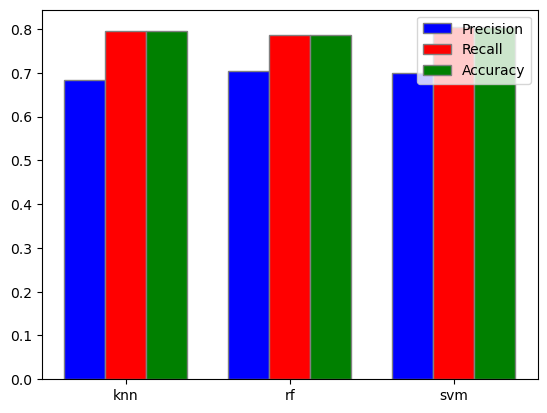

In [ ]:
import matplotlib.pyplot as plt

knn_report = classification_report(y_test, knn_y_pred, output_dict=True)
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)

precision = {
    "knn": knn_report["weighted avg"]["precision"],
    "rf": rf_report["weighted avg"]["precision"],
}

recall = {
    "knn": knn_report["weighted avg"]["recall"],
    "rf": rf_report["weighted avg"]["recall"],
}

accuracy = {
    "knn": knn_report["accuracy"],
    "rf": rf_report["accuracy"],
}

print(precision)
print(recall)
print(accuracy)

fig, ax = plt.subplots()

barWidth = 0.25

r1 = range(len(precision))
r2 = [x + barWidth for x in r1]

ax.bar(r1, list(precision.values()), color="b", width=barWidth, edgecolor="grey", label="Precision")
ax.bar(r2, list(recall.values()), color="r", width=barWidth, edgecolor="grey", label="Recall")

ax.set_xticks([r + barWidth for r in range(len(precision))])
ax.set_xticklabels(precision.keys())

plt.legend()
plt.show()

In [132]:
import joblib

joblib.dump(knn, "../data/models/knn.joblib")
joblib.dump(best_rf, "../data/models/rf.joblib")

['../data/models/rf.joblib']